In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from typing import List
import itertools

In [60]:
# organizing datasets
season1718 = pd.read_csv("./NBA_season1718_salary.csv")
season1718.head()

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0


In [61]:
players = pd.read_csv("./players.csv")
players.head()

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana
2,2,Leo Barnhorst,193.0,86.0,University of Notre Dame,1924.0,NaN,NaN
3,3,Ed Bartels,196.0,88.0,North Carolina State University,1925.0,NaN,NaN
4,4,Ralph Beard,178.0,79.0,University of Kentucky,1927.0,Hardinsburg,Kentucky


In [62]:
season_stats = pd.read_csv("./Seasons_Stats.csv")
season_stats.head()

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [63]:
stats2017 = season_stats[season_stats['Year'] == 2017.0]
stat = stats2017.drop_duplicates(subset=['Player'], keep='first')
stats = stat[['Year','Player','Pos','Age','G',
                   'PTS','AST','BLK','STL']]
stats

,Year,Player,Pos,Age,G,PTS,AST,BLK,STL
24096,2017.0,Alex Abrines,SG,23.0,68.0,406.0,40.0,8.0,37.0
24097,2017.0,Quincy Acy,PF,26.0,38.0,222.0,18.0,15.0,14.0
24100,2017.0,Steven Adams,C,23.0,80.0,905.0,86.0,78.0,88.0
24101,2017.0,Arron Afflalo,SG,31.0,61.0,515.0,78.0,7.0,21.0
24102,2017.0,Alexis Ajinca,C,28.0,39.0,207.0,12.0,22.0,20.0
...,...,...,...,...,...,...,...,...,...
24686,2017.0,Cody Zeller,PF,24.0,62.0,639.0,99.0,58.0,62.0
24687,2017.0,Tyler Zeller,C,27.0,51.0,178.0,42.0,21.0,7.0
24688,2017.0,Stephen Zimmerman,C,20.0,19.0,23.0,4.0,5.0,2.0
24689,2017.0,Paul Zipser,SF,22.0,44.0,240.0,36.0,16.0,15.0


In [64]:
new_1718 = season1718.drop_duplicates(subset=['Player'], keep='first')
new_1718

,Unnamed: 0,Player,Tm,season17_18
0,1,Stephen Curry,GSW,34682550.0
1,2,LeBron James,CLE,33285709.0
2,3,Paul Millsap,DEN,31269231.0
3,4,Gordon Hayward,BOS,29727900.0
4,5,Blake Griffin,DET,29512900.0
...,...,...,...,...
564,565,Jameel Warney,DAL,46080.0
565,566,Marcus Thornton,CLE,46080.0
567,568,Axel Toupane,NOP,25000.0
569,570,Chris Johnson,HOU,25000.0


In [65]:
result = pd.merge(stats, new_1718, on="Player")
stats_salary = result.drop_duplicates(subset=['Player'], keep='first')
stats_salary

,Year,Player,Pos,Age,G,PTS,AST,BLK,STL,Unnamed: 0,Tm,season17_18
0,2017.0,Alex Abrines,SG,23.0,68.0,406.0,40.0,8.0,37.0,185,OKC,5725000.0
1,2017.0,Quincy Acy,PF,26.0,38.0,222.0,18.0,15.0,14.0,350,BRK,1709538.0
2,2017.0,Steven Adams,C,23.0,80.0,905.0,86.0,78.0,88.0,32,OKC,22471910.0
3,2017.0,Arron Afflalo,SG,31.0,61.0,515.0,78.0,7.0,21.0,291,ORL,2328652.0
4,2017.0,Alexis Ajinca,C,28.0,39.0,207.0,12.0,22.0,20.0,206,NOP,4961798.0
...,...,...,...,...,...,...,...,...,...,...,...,...
406,2017.0,Cody Zeller,PF,24.0,62.0,639.0,99.0,58.0,62.0,95,CHO,12584270.0
407,2017.0,Tyler Zeller,C,27.0,51.0,178.0,42.0,21.0,7.0,349,MIL,1709538.0
408,2017.0,Stephen Zimmerman,C,20.0,19.0,23.0,4.0,5.0,2.0,443,LAL,1312611.0
409,2017.0,Paul Zipser,SF,22.0,44.0,240.0,36.0,16.0,15.0,432,CHI,1312611.0


In [66]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

histograms of variables to see distribution and spread


array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'G'}>],
       [<AxesSubplot:title={'center':'PTS'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'BLK'}>],
       [<AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'season17_18'}>]], dtype=object)

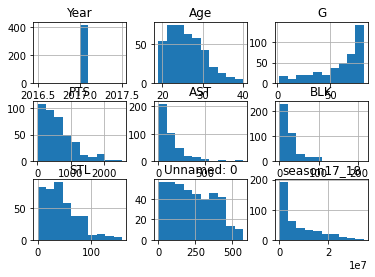

In [67]:
print('histograms of variables to see distribution and spread')
stats_salary.hist()

In [68]:
print('correlation matrix')
stats_corr = stats_salary.drop(['Year', 'Unnamed: 0'], axis = 1)
stats_corr.corr()

correlation matrix


,Age,G,PTS,AST,BLK,STL,season17_18
Age,1.000000,0.127561,0.083965,0.135245,-0.017940,0.104931,0.234489
G,0.127561,1.000000,0.643352,0.476724,0.449877,0.668298,0.403722
PTS,0.083965,0.643352,1.000000,0.714080,0.434270,0.730740,0.715774
AST,0.135245,0.476724,0.714080,1.000000,0.145540,0.737089,0.529849
BLK,-0.017940,0.449877,0.434270,0.145540,1.000000,0.363591,0.405988
STL,0.104931,0.668298,0.730740,0.737089,0.363591,1.000000,0.563794
season17_18,0.234489,0.403722,0.715774,0.529849,0.405988,0.563794,1.000000


In [69]:
# making training and testing with random selection
training = stats_salary.sample(frac=0.8, random_state=25)
testing = stats_salary.drop(training.index)
training

,Year,Player,Pos,Age,G,PTS,AST,BLK,STL,Unnamed: 0,Tm,season17_18
266,2017.0,Markieff Morris,PF,27.0,76.0,1063.0,126.0,42.0,82.0,141,WAS,8000000.0
223,2017.0,Alex Len,C,23.0,77.0,613.0,44.0,98.0,37.0,219,PHO,4187599.0
23,2017.0,Harrison Barnes,PF,24.0,79.0,1518.0,117.0,15.0,66.0,26,DAL,23112004.0
189,2017.0,Demetrius Jackson,PG,22.0,5.0,10.0,3.0,0.0,0.0,517,BOS,92858.0
94,2017.0,Malcolm Delaney,PG,27.0,73.0,391.0,193.0,1.0,39.0,280,ATL,2500000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5,2017.0,Cole Aldrich,C,28.0,62.0,105.0,25.0,23.0,25.0,155,MIN,7300000.0
380,2017.0,Dion Waiters,SG,25.0,46.0,729.0,200.0,20.0,41.0,110,MIA,11000000.0
79,2017.0,DeMarcus Cousins,C,26.0,72.0,1942.0,332.0,92.0,100.0,50,NOP,18063850.0
187,2017.0,Kyrie Irving,PG,24.0,72.0,1816.0,418.0,25.0,83.0,48,BOS,18868625.0


In [70]:
testing

,Year,Player,Pos,Age,G,PTS,AST,BLK,STL,Unnamed: 0,Tm,season17_18
2,2017.0,Steven Adams,C,23.0,80.0,905.0,86.0,78.0,88.0,32,OKC,22471910.0
14,2017.0,Trevor Ariza,SF,31.0,80.0,936.0,175.0,20.0,147.0,153,HOU,7420912.0
22,2017.0,J.J. Barea,PG,32.0,35.0,381.0,193.0,1.0,14.0,229,DAL,3903900.0
36,2017.0,Davis Bertans,PF,24.0,67.0,303.0,46.0,28.0,20.0,418,SAS,1312611.0
44,2017.0,Joel Bolomboy,PF,23.0,12.0,22.0,2.0,2.0,1.0,417,UTA,1312611.0
...,...,...,...,...,...,...,...,...,...,...,...,...
389,2017.0,Okaro White,PF,24.0,35.0,98.0,21.0,10.0,10.0,435,ATL,1312611.0
394,2017.0,Deron Williams,PG,32.0,64.0,701.0,360.0,8.0,31.0,191,BRK,5500000.0
395,2017.0,Derrick Williams,PF,25.0,50.0,304.0,28.0,7.0,14.0,512,LAL,104059.0
403,2017.0,Joe Young,PG,24.0,33.0,68.0,15.0,0.0,4.0,394,IND,1471382.0


PTS and salary


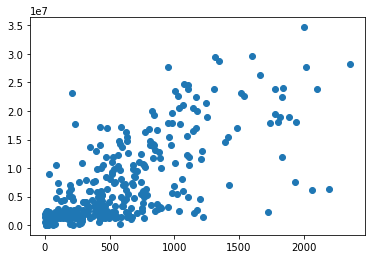

In [71]:
plt.scatter(training['PTS'], training['season17_18'])
print('PTS and salary')

In [72]:
x = training.drop(['season17_18', 'Player', 'Pos', 'Tm', 'Unnamed: 0'], axis = 1).values
y = training['season17_18'].values
reg = LinearRegression().fit(x, y)
print(f"Training score: {reg.score(x, y)}")

Training score: 0.5465505462305249


In [73]:
x_test = testing.drop(['season17_18', 'Player', 'Pos', 'Tm', 'Unnamed: 0'], axis = 1).values
y_test = testing['season17_18'].values
print(f"Testing score: {reg.score(x_test, y_test)}")

Testing score: 0.6635211828609049
